## Tested by Kolluru Saharsh 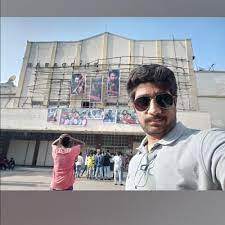

# 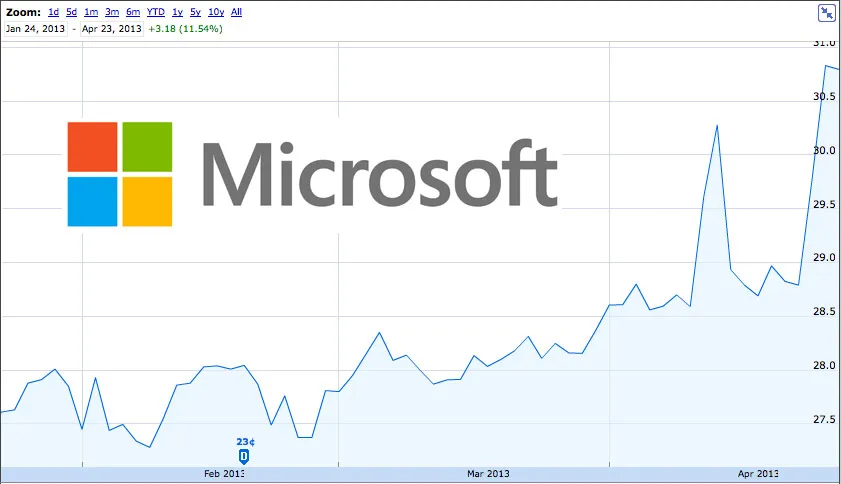

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tabulate import tabulate
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('MSFT.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Dates'] = df['Date'].dt.date
df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume,Dates
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800,1986-03-13
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000,1986-03-14
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200,1986-03-17
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400,1986-03-18
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400,1986-03-19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9083 non-null   datetime64[ns]
 1   Open       9083 non-null   float64       
 2   High       9083 non-null   float64       
 3   Low        9083 non-null   float64       
 4   Close      9083 non-null   float64       
 5   Adj Close  9083 non-null   float64       
 6   Volume     9083 non-null   int64         
 7   Dates      9083 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 567.8+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


In [6]:
df.mean()

Open         4.132494e+01
High         4.176089e+01
Low          4.087849e+01
Close        4.133563e+01
Adj Close    3.625612e+01
Volume       5.875055e+07
dtype: float64

In [7]:
df.skew()

Open         2.850823
High         2.849065
Low          2.851140
Close        2.850353
Adj Close    2.968887
Volume       5.103309
dtype: float64

In [8]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Dates        0
dtype: int64

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dates'], dtype='object')

In [10]:
df.shape

(9083, 8)

# # EDA

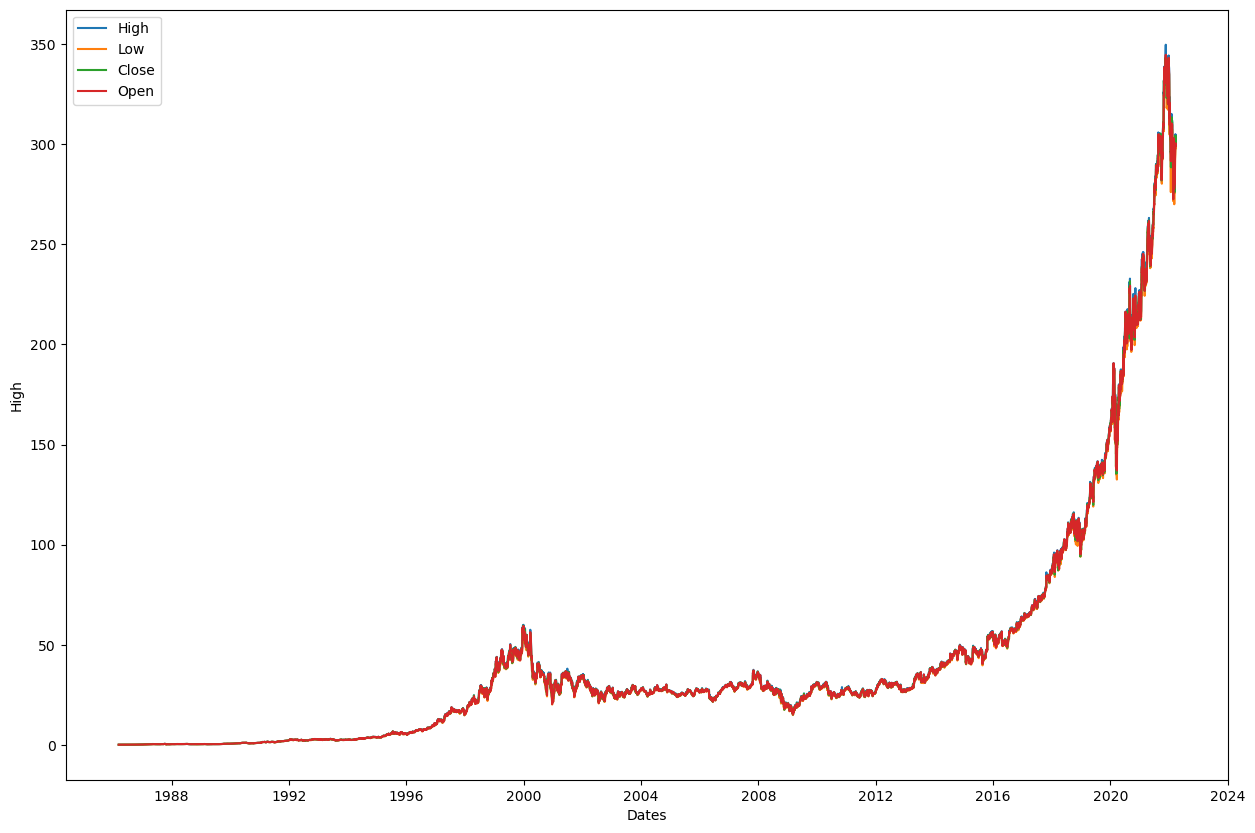

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Dates', y='High', label='High')
sns.lineplot(data=df, x='Dates', y='Low', label='Low')
sns.lineplot(data=df, x='Dates', y='Close', label='Close')
sns.lineplot(data=df, x='Dates', y='Open', label='Open')
plt.legend()
plt.show()

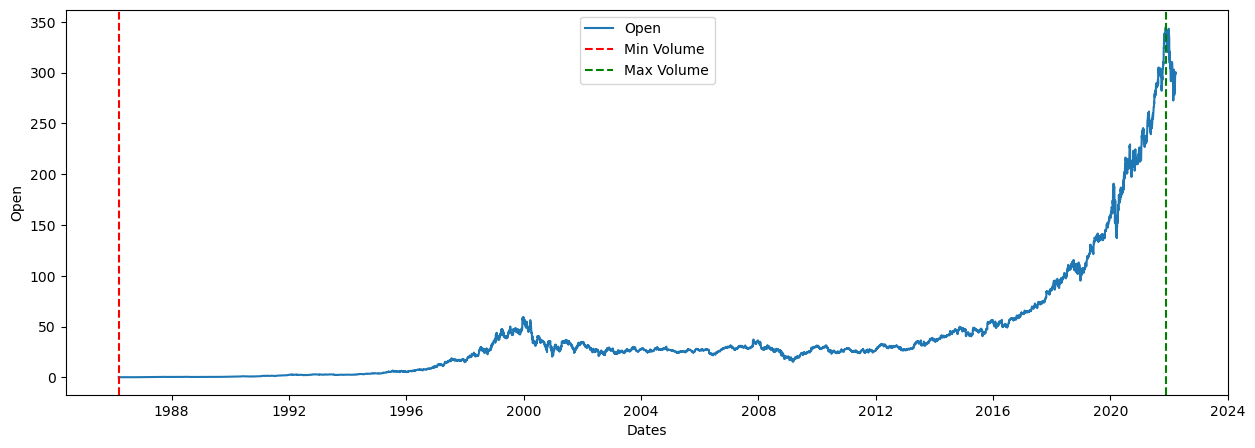

In [12]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df, x='Dates', y='Open', label='Open')

min_index = df['Open'].idxmin()
max_index = df['Open'].idxmax()

min_date = df.loc[min_index, 'Dates']
max_date = df.loc[max_index, 'Dates']

plt.axvline(x=min_date, color='r', linestyle='--', label='Min Volume')
plt.axvline(x=max_date, color='g', linestyle='--', label='Max Volume')

plt.legend()
plt.show()


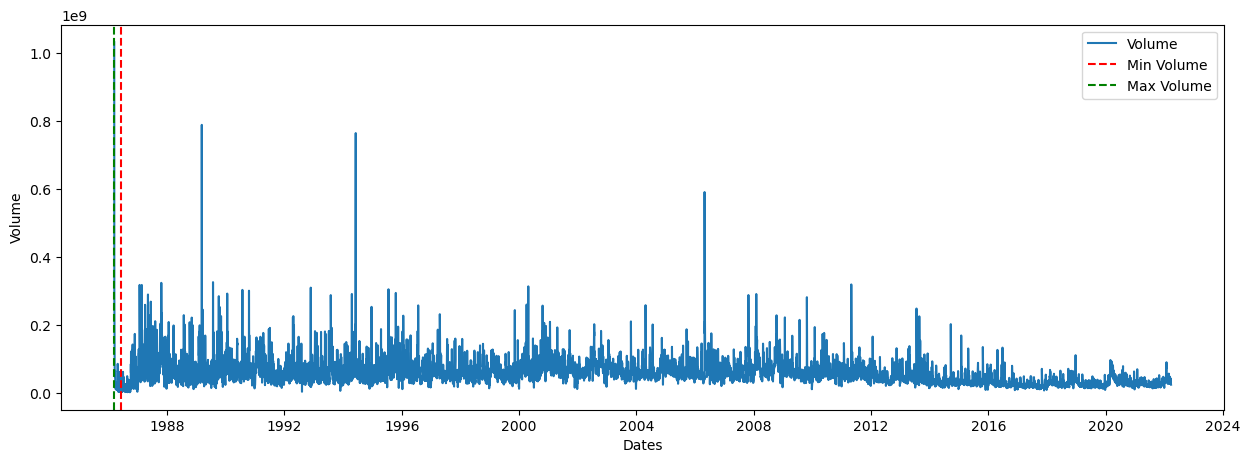

In [13]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df, x='Dates', y='Volume', label='Volume')

min_index = df['Volume'].idxmin()
max_index = df['Volume'].idxmax()

min_date = df.loc[min_index, 'Dates']
max_date = df.loc[max_index, 'Dates']

plt.axvline(x=min_date, color='r', linestyle='--', label='Min Volume')
plt.axvline(x=max_date, color='g', linestyle='--', label='Max Volume')

plt.legend()
plt.show()


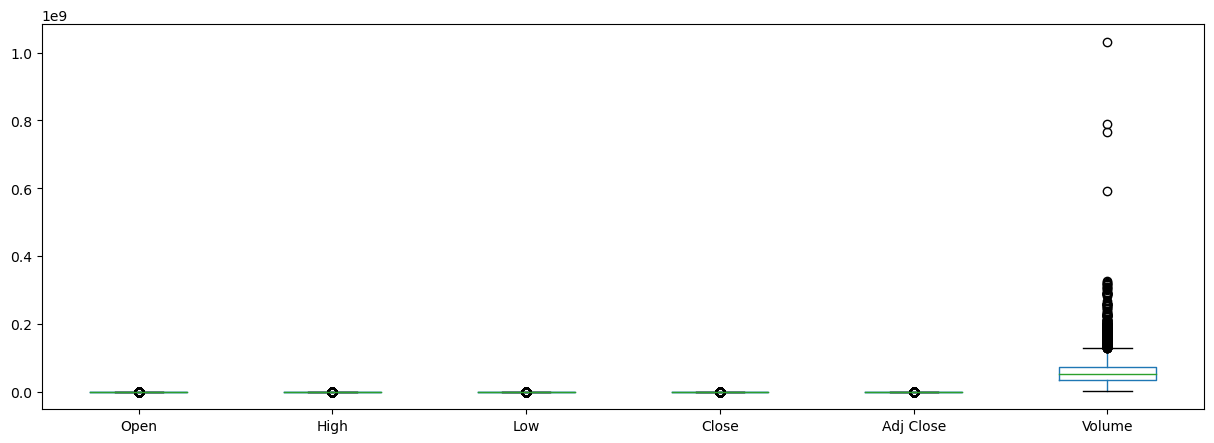

In [14]:
df.boxplot(figsize=(15,5))
plt.grid(False)
plt.show()

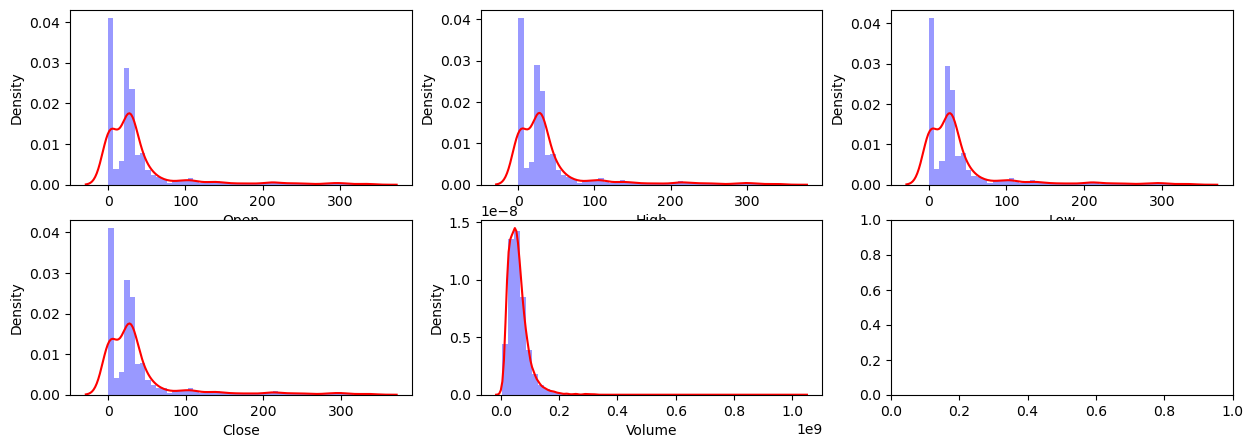

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

sns.distplot(df['Open'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['High'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Low'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Close'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Volume'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

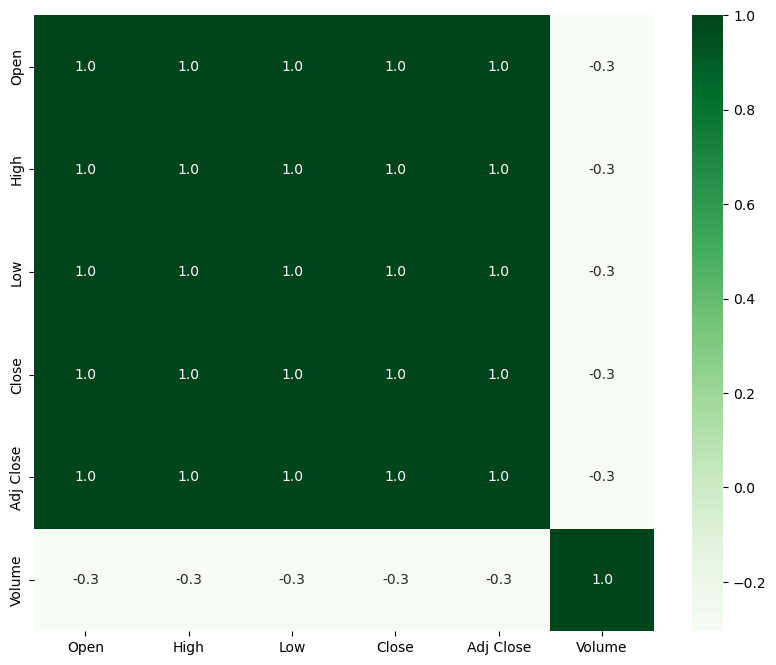

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='Greens')
plt.show()

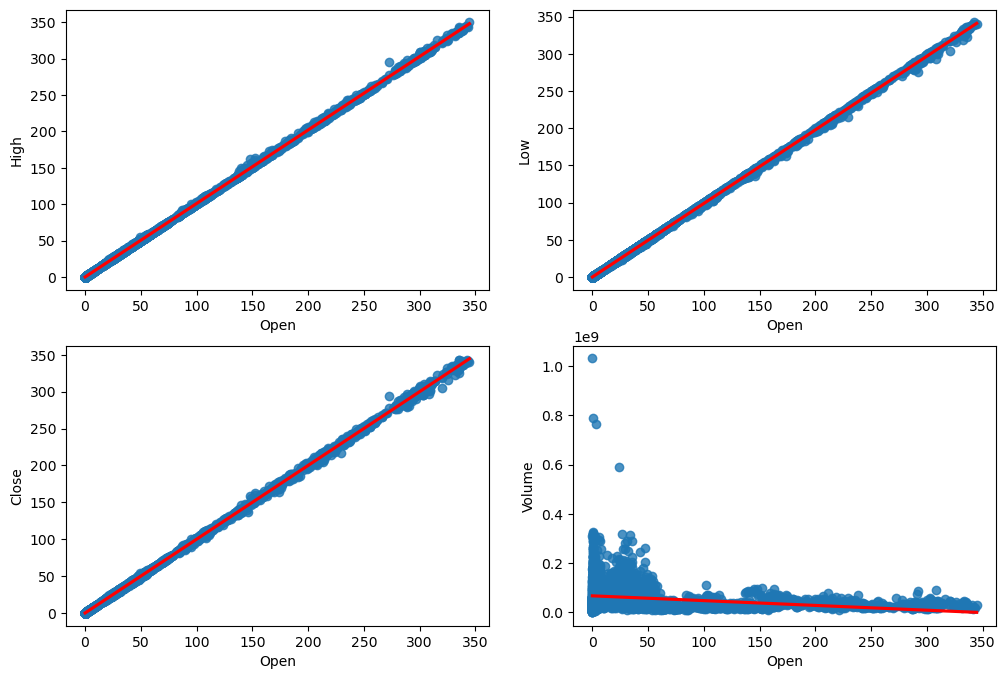

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.regplot(x = "Open", y = "High", data = df, line_kws = {"color": "red"},ax = ax[0,0])
sns.regplot(data = df, x='Open', y='Low', line_kws = {"color": "red"},ax = ax[0,1])
sns.regplot(data = df, x='Open', y='Close', line_kws = {"color": "red"},ax = ax[1,0])
sns.regplot(data = df, x='Open', y='Volume', line_kws = {"color": "red"},ax = ax[1,1])

plt.show()

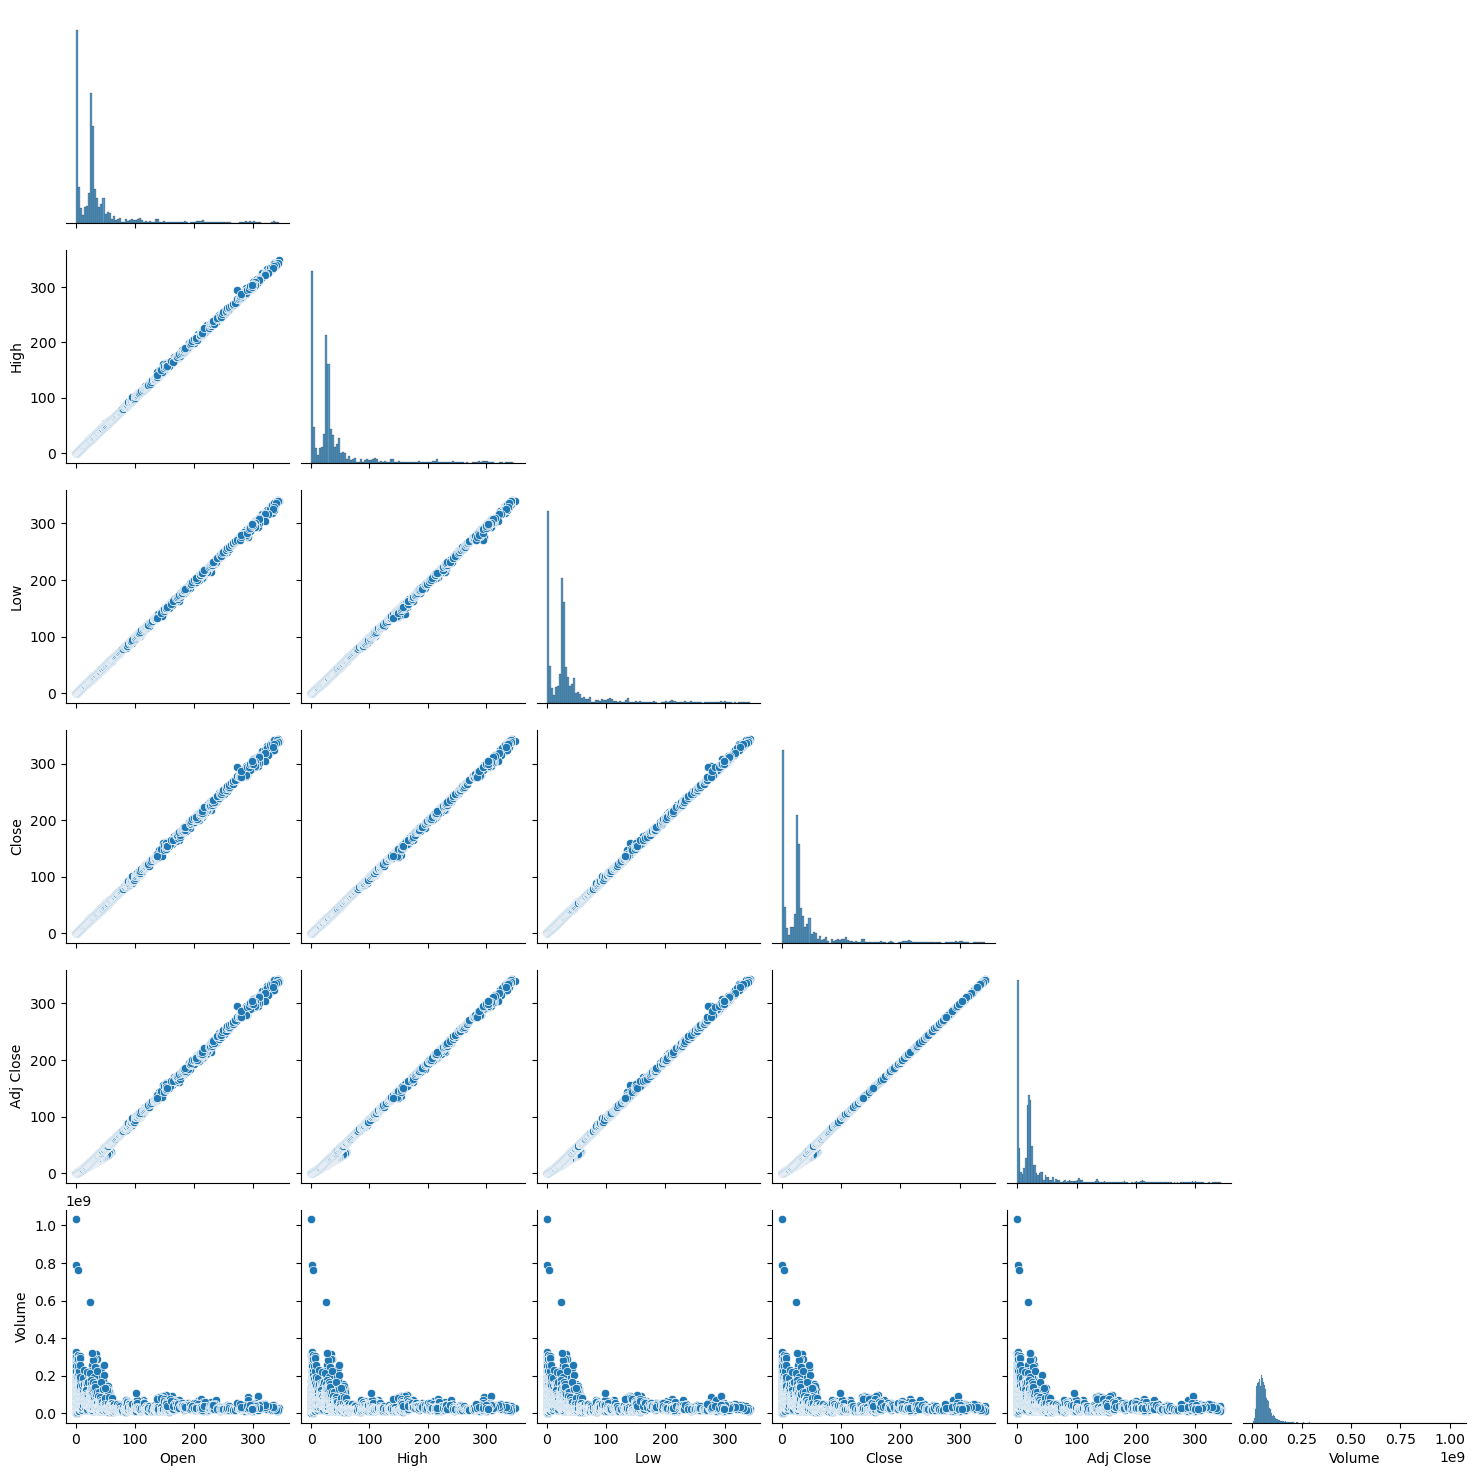

In [18]:
sns.pairplot(df, corner=True)
plt.show()


## Modelling and Evaluation 

In [19]:
df.set_index('Dates', inplace=True)

# ARIMA MODEL

<Figure size 1500x2000 with 0 Axes>

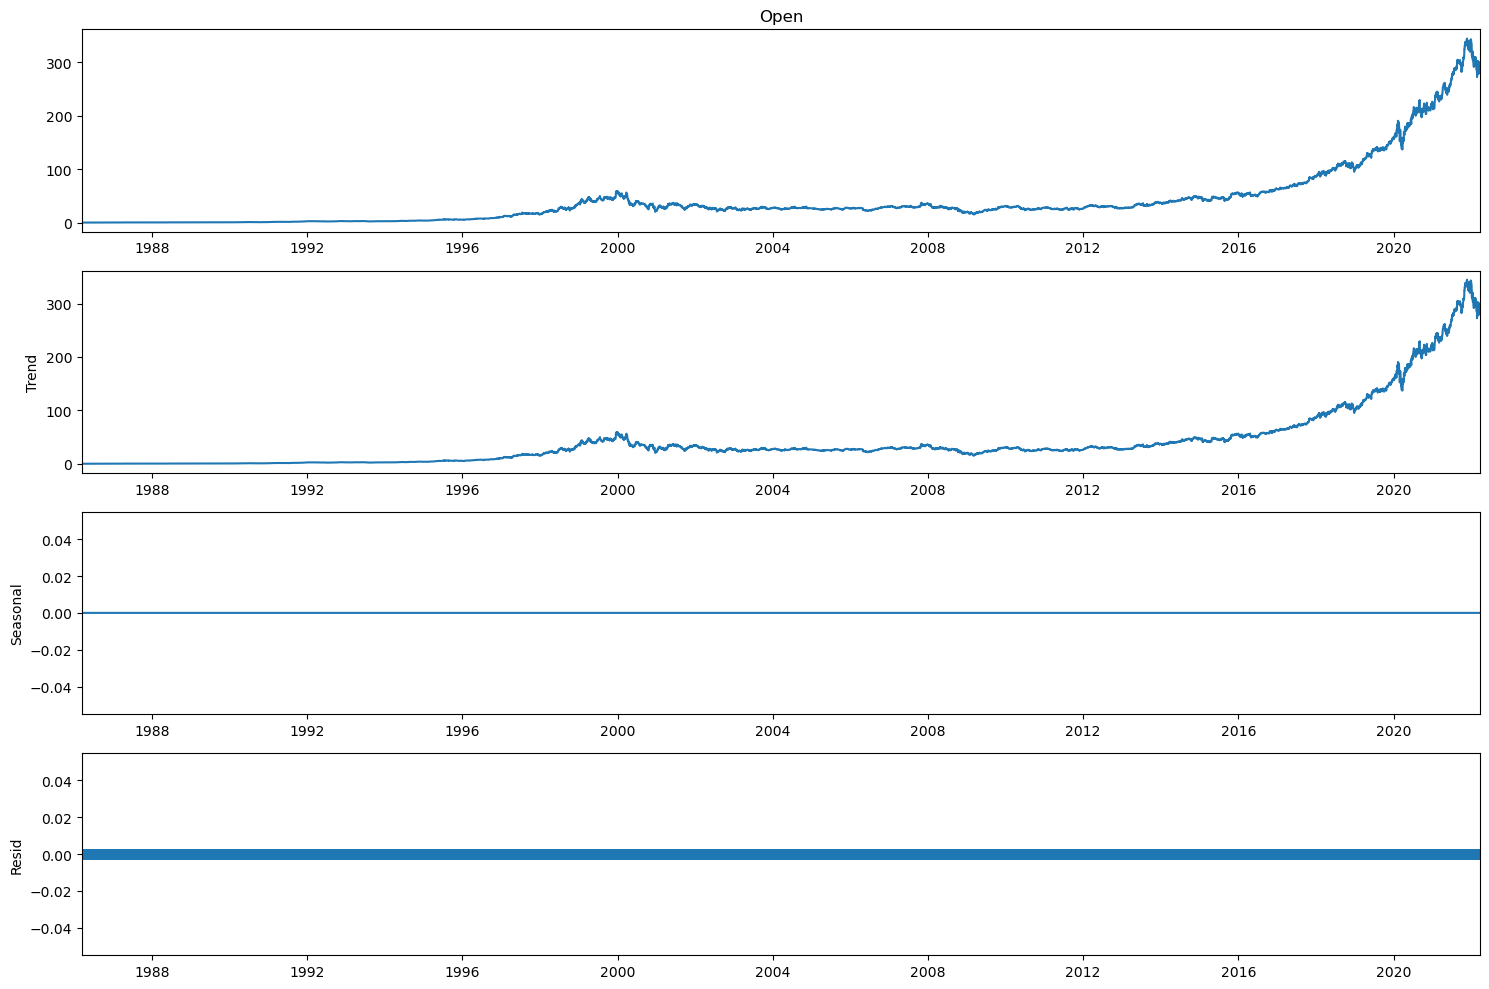

In [20]:
descompose = seasonal_decompose(df['Open'], model='additive', period=1)
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure(figsize=(15, 20))
descompose.plot()
plt.show()

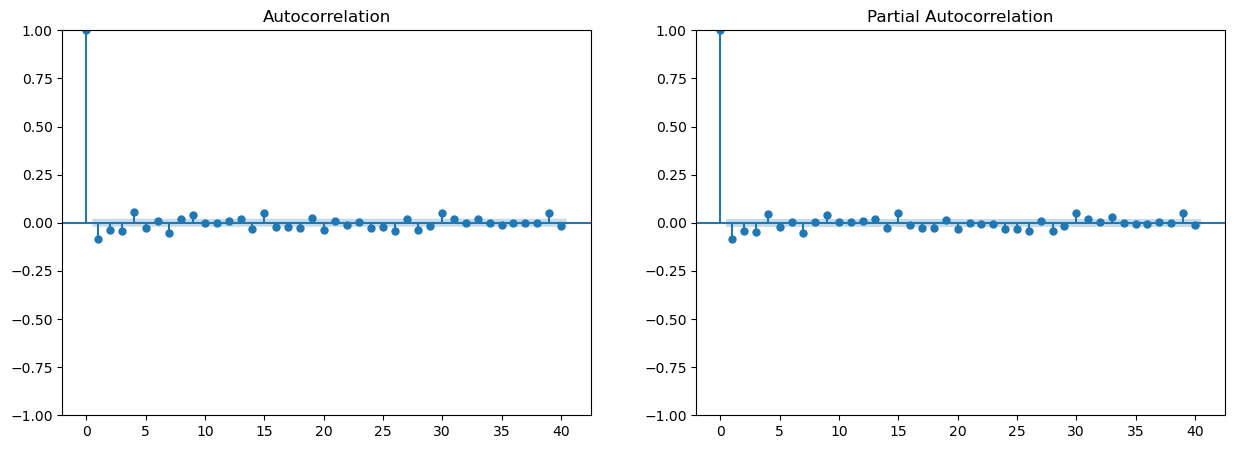

In [21]:
df_g1 = df.groupby(['Dates'])['Open'].sum()

df_diff = df_g1.diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df_diff, lags=40, ax=ax[0])
plot_pacf(df_diff, lags=40, ax=ax[1])

plt.show()

In [23]:
model = ARIMA(df_g1,  order=(1, 1, 1))
results = model.fit()
summary_table_atend = results.summary()
summary_table_atend

NameError: name 'ARIMA' is not defined

In [25]:
!pip install ARIMA  

ERROR: Could not find a version that satisfies the requirement ARIMA (from versions: none)
ERROR: No matching distribution found for ARIMA


In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example time series data
ts = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Define the ARIMA model parameters
p = 1  # number of lag observations
d = 1  # degree of differencing
q = 1  # size of moving average window

# Initialize and fit the ARIMA model
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=5)  # Forecasting the next 5 time points

# Output of the forecast
print(forecast)


10    10.999892
11    11.999566
12    12.999024
13    13.998265
14    14.997290
Name: predicted_mean, dtype: float64


In [28]:
model = ARIMA(df_g1,  order=(1, 1, 1))

results = model.fit()

summary_table_atend = results.summary()

summary_table_atend

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 9083
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14838.578
Date:                Wed, 06 Dec 2023   AIC                          29683.156
Time:                        16:30:25   BIC                          29704.499
Sample:                             0   HQIC                         29690.415
                               - 9083                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3882      0.026     15.026      0.000       0.338       0.439
ma.L1         -0.4776      0.025    -19.282      0.000      -0.526      -0.429
sigma2         1.5370      0.005    322.099      0.000       1.528       1.546
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            819356.90
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):             266.58   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

╒═══════╤═══════════════╕
│       │        Resids │
╞═══════╪═══════════════╡
│ count │ 9083          │
├───────┼───────────────┤
│ mean  │    0.0385676  │
├───────┼───────────────┤
│ std   │    1.23915    │
├───────┼───────────────┤
│ min   │  -17.6425     │
├───────┼───────────────┤
│ 25%   │   -0.15611    │
├───────┼───────────────┤
│ 50%   │    0.00244217 │
├───────┼───────────────┤
│ 75%   │    0.200044   │
├───────┼───────────────┤
│ max   │   21.0643     │
╘═══════╧═══════════════╛


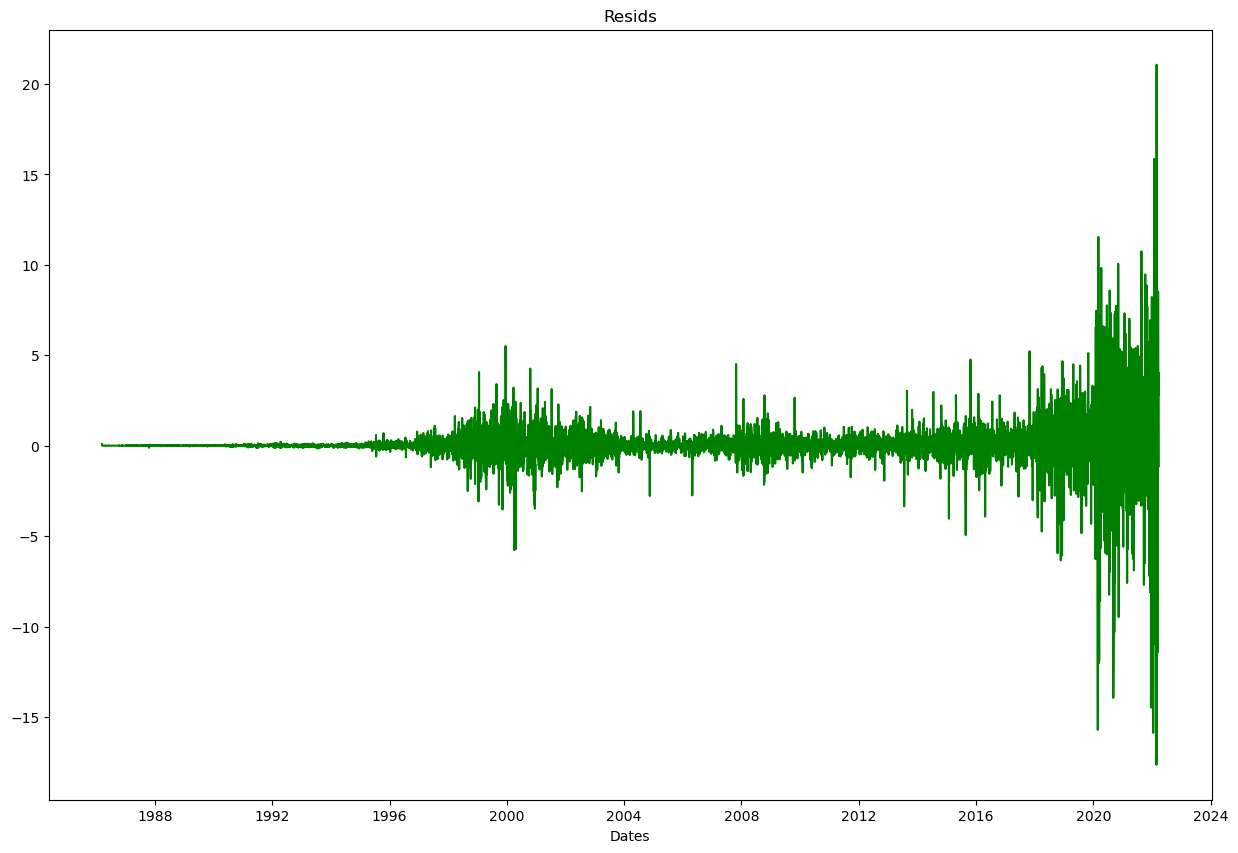

In [29]:
results.resid.plot( color='green', title="Resids")

resid_summary_atend_df = pd.DataFrame(results.resid.describe(), columns=['Resids'])

print(tabulate(resid_summary_atend_df, headers='keys', tablefmt='fancy_grid'))

In [30]:
n_pasos = 10
modeler = ARIMA(df_g1, order=(1, 1, 1))
results = modeler.fit()
forecast = results.forecast(steps=n_pasos)

start_date = df_g1.index[0]
end_date = df_g1.index[-1]
prediccion = results.predict(start=start_date, end=end_date)

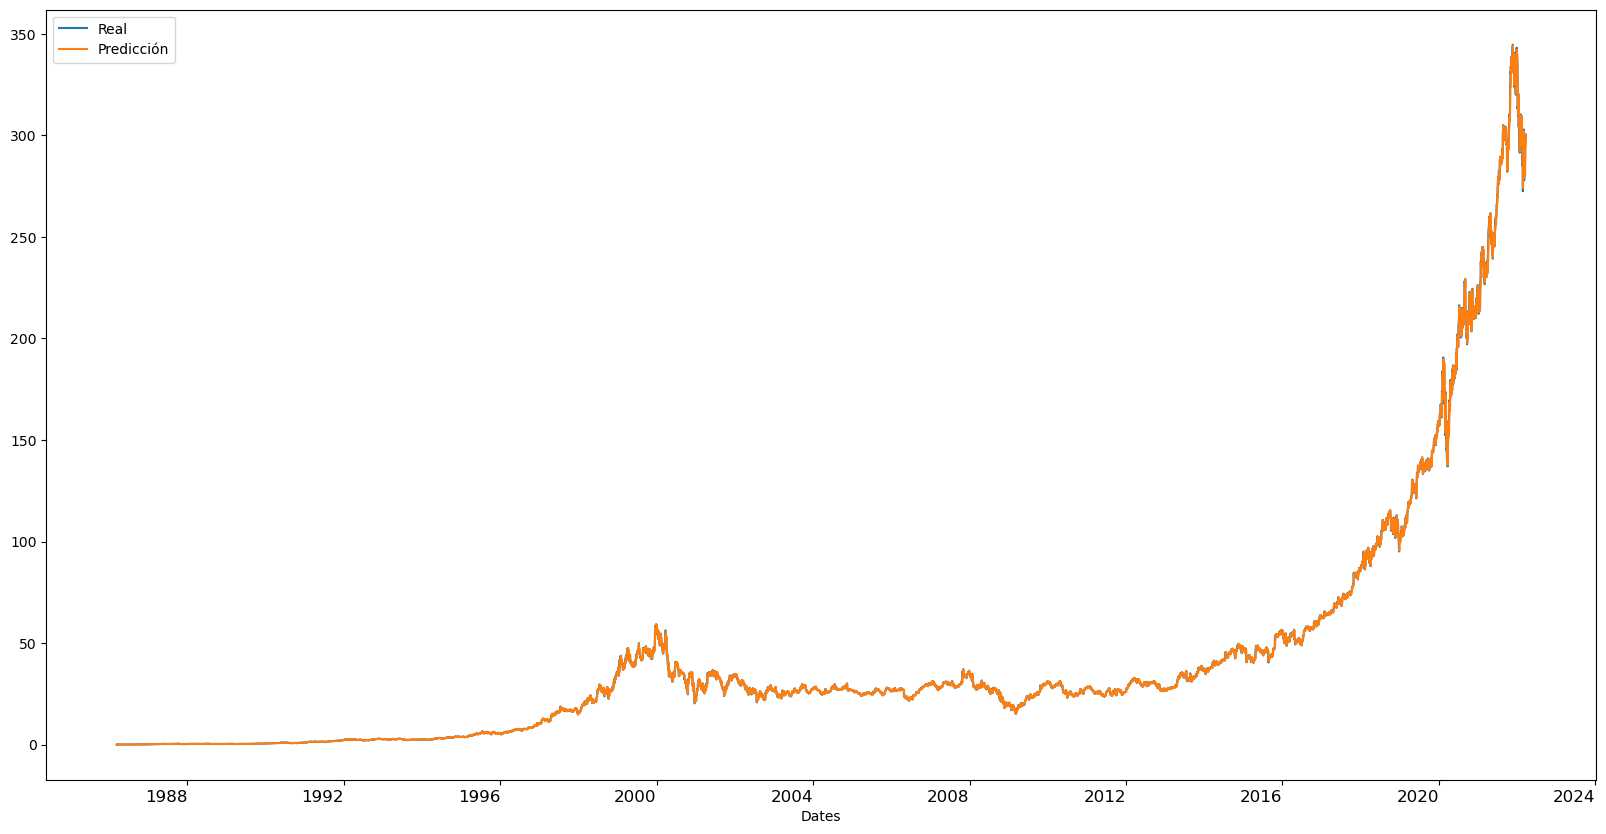

In [31]:
plt.figure(figsize=(20, 10))

plt.plot(df_g1, label='Real')
sns.lineplot(prediccion.index, prediccion.values, label='Predicción')

plt.legend()
plt.xticks(ha='right', fontsize=12)
plt.show()

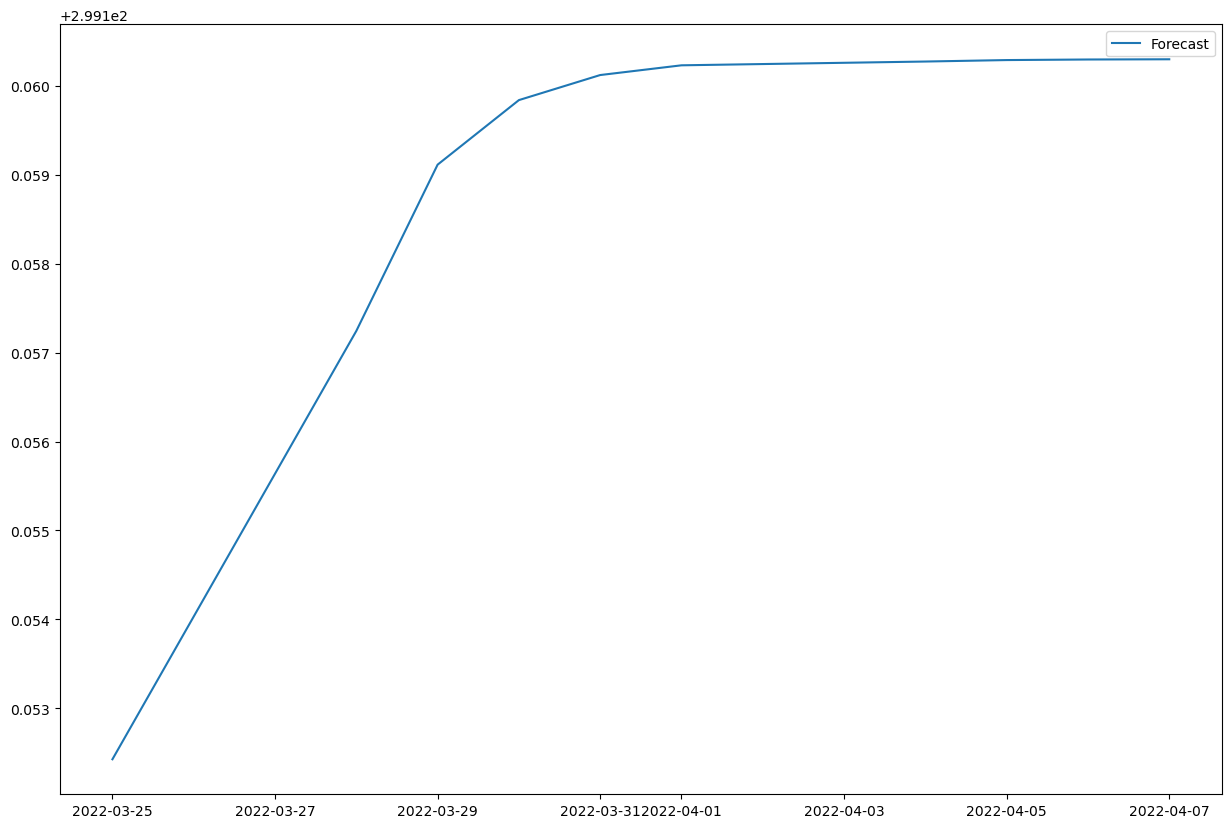

In [32]:
forecast_steps = 10 
forecast_index = pd.date_range(start=df_g1.index[-1], periods=forecast_steps + 1, freq='B')[1:]

sns.lineplot(forecast_index, forecast.values, label='Forecast')
plt.show()


# ARIMA MODEL VOLUME 

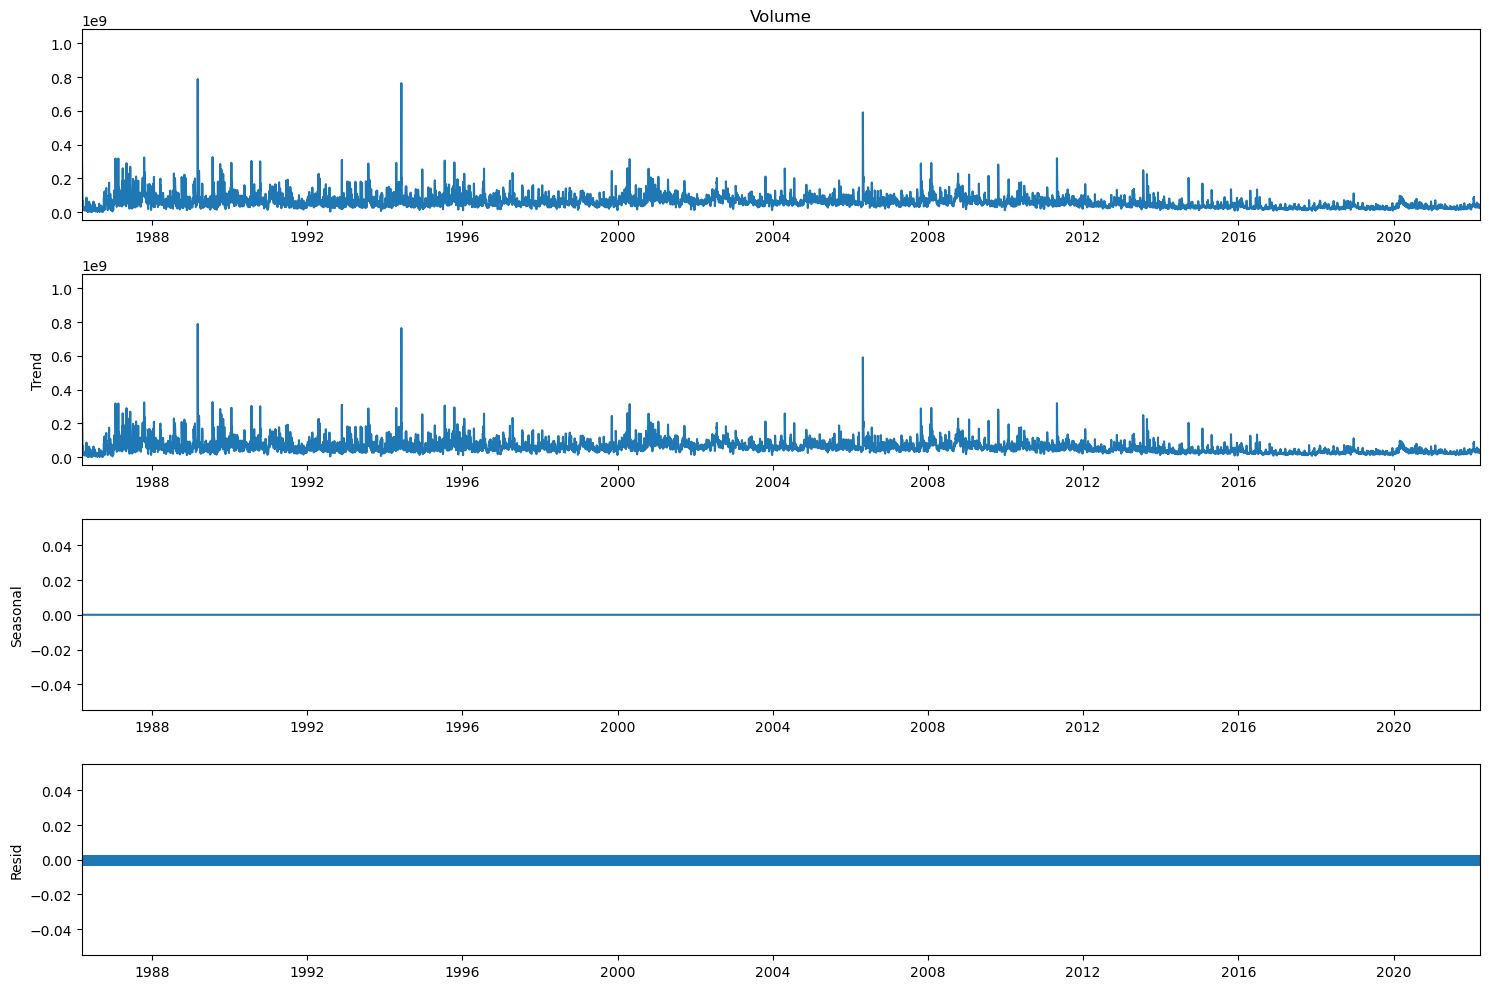

In [34]:
descompose = seasonal_decompose(df['Volume'], model='additive', period=1)
plt.rcParams['figure.figsize'] = (15, 10)
descompose.plot()
plt.show()

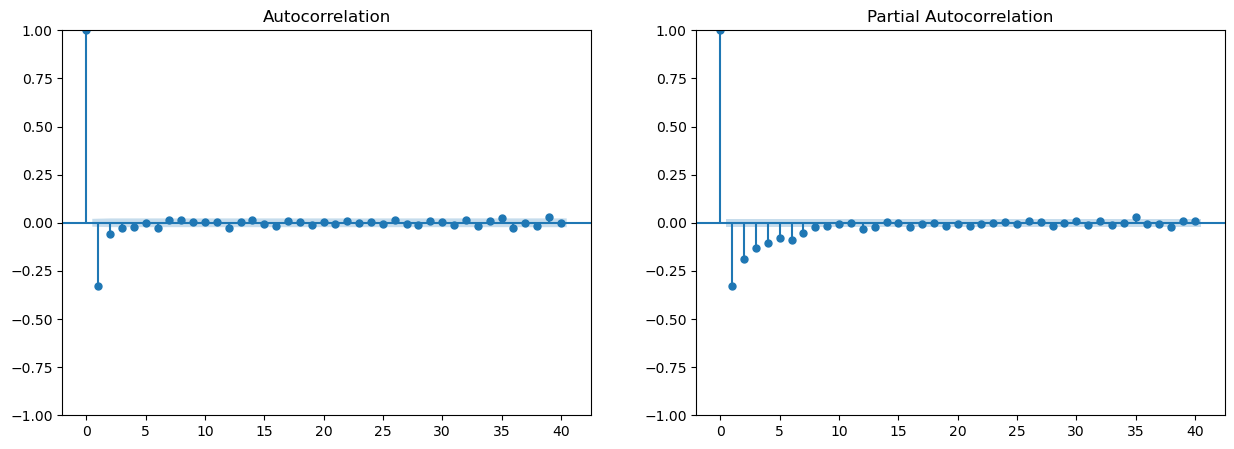

In [35]:
df_g2 = df.groupby(['Dates'])['Volume'].sum()
df_diff = df_g2.diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df_diff, lags=40, ax=ax[0])
plot_pacf(df_diff, lags=40, ax=ax[1])

plt.show()

In [36]:
model = ARIMA(df_g2,  order=(1, 1, 1))

results = model.fit()

summary_table_atend = results.summary()

summary_table_atend

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 9083
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -169017.427
Date:                Wed, 06 Dec 2023   AIC                         338040.853
Time:                        16:32:05   BIC                         338062.196
Sample:                             0   HQIC                        338048.112
                               - 9083                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3781      0.004     97.544      0.000       0.370       0.386
ma.L1         -0.9462      0.003   -291.855      0.000      -0.953      -0.940
sigma2      9.149e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):           3630251.01
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             5.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       100.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.3e+47. Standard errors may be unstable.
"""

╒═══════╤═══════════════════╕
│       │            Resids │
╞═══════╪═══════════════════╡
│ count │    9083           │
├───────┼───────────────────┤
│ mean  │ -146857           │
├───────┼───────────────────┤
│ std   │       3.12327e+07 │
├───────┼───────────────────┤
│ min   │      -4.04516e+08 │
├───────┼───────────────────┤
│ 25%   │      -1.27519e+07 │
├───────┼───────────────────┤
│ 50%   │      -3.55175e+06 │
├───────┼───────────────────┤
│ 75%   │       6.75747e+06 │
├───────┼───────────────────┤
│ max   │       1.03179e+09 │
╘═══════╧═══════════════════╛


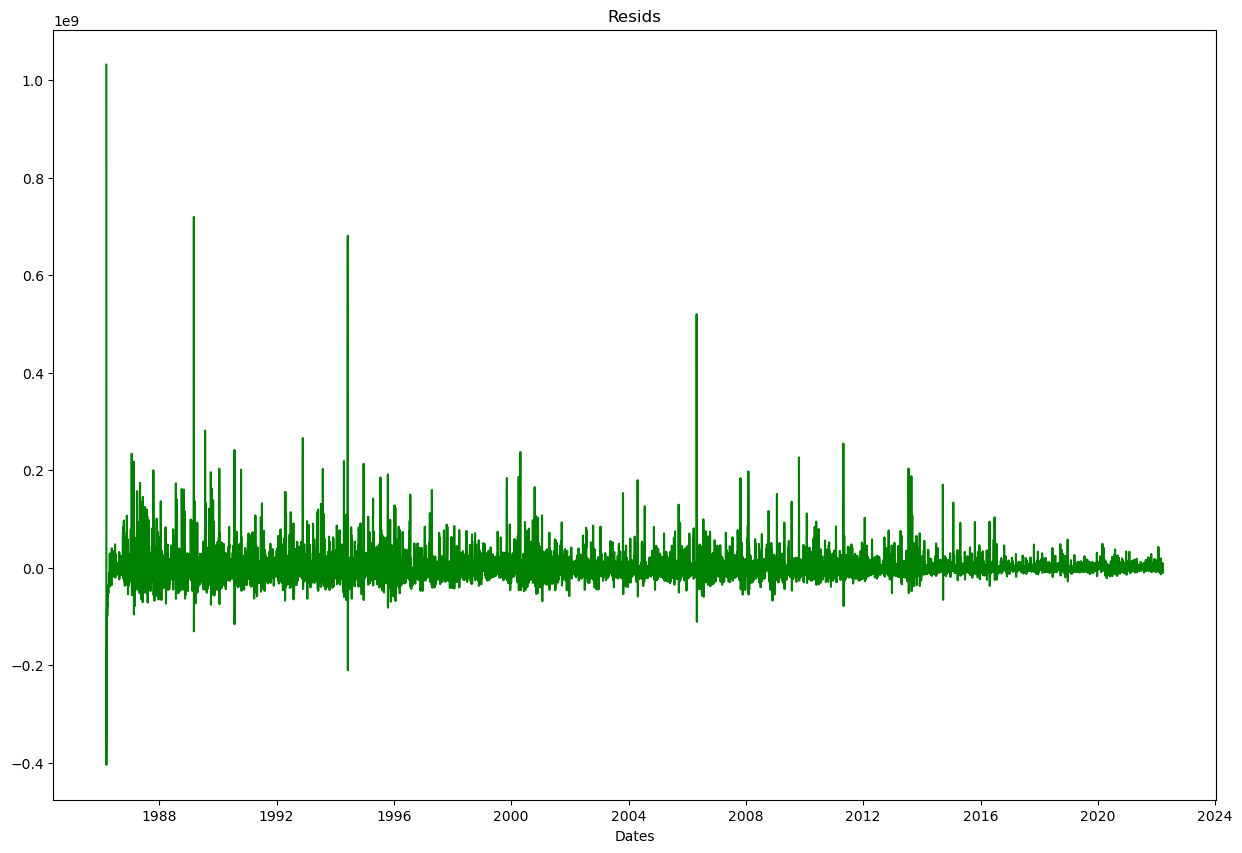

In [37]:
results.resid.plot( color='green', title="Resids")

resid_summary_atend_df = pd.DataFrame(results.resid.describe(), columns=['Resids'])

print(tabulate(resid_summary_atend_df, headers='keys', tablefmt='fancy_grid'))

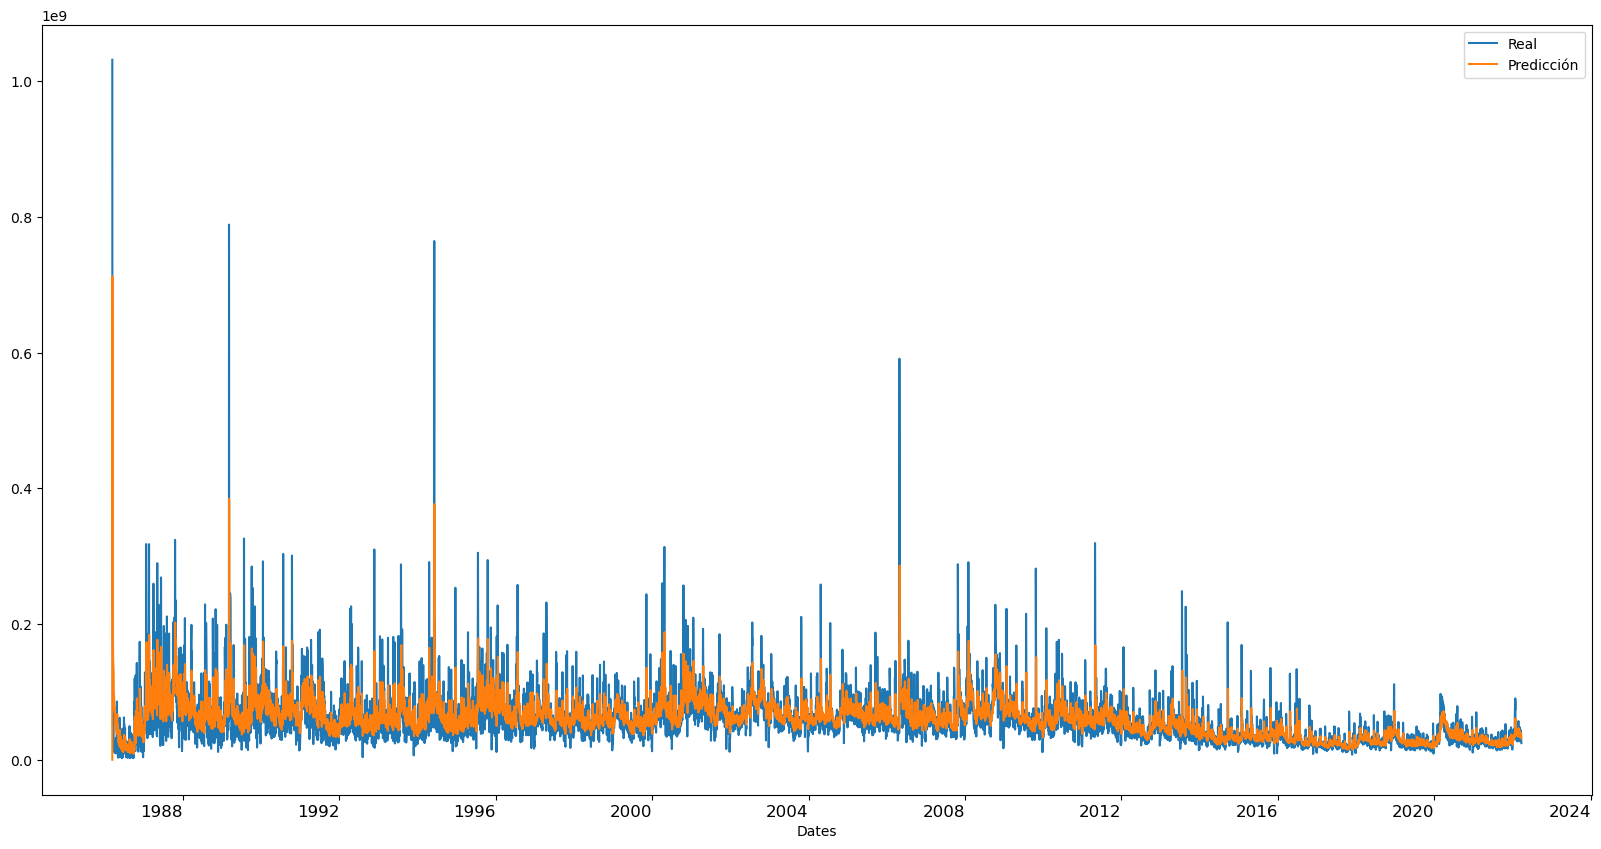

In [38]:
n_pasos = 10
modeler = ARIMA(df_g2, order=(1, 1, 1))
results = modeler.fit()
forecast = results.forecast(steps=n_pasos)

start_date = df_g2.index[0]
end_date = df_g2.index[-1]
prediccion = results.predict(start=start_date, end=end_date)
plt.figure(figsize=(20, 10))

plt.plot(df_g2, label='Real')
sns.lineplot(prediccion.index, prediccion.values, label='Predicción')

plt.legend()
plt.xticks(ha='right', fontsize=12)
plt.show()

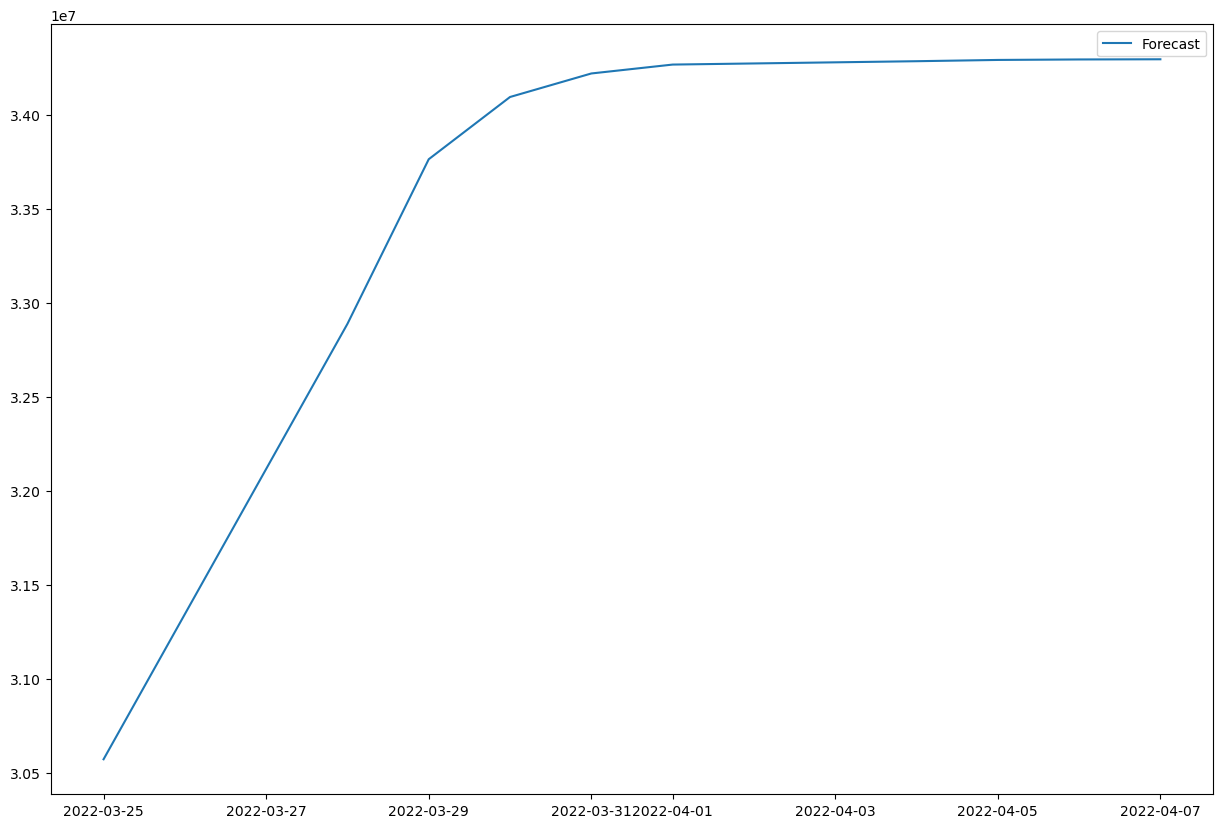

In [39]:
forecast_steps = 10  
forecast_index = pd.date_range(start=df_g2.index[-1], periods=forecast_steps + 1, freq='B')[1:]

sns.lineplot(forecast_index, forecast.values, label='Forecast')
plt.show()

# Evaluation of ARIMA Model for Open

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'forecast' is defined in your code and 'df_g1' is your DataFrame
y_true = df_g1.tail(n_pasos)  # Replace 'n_pasos' with your specific variable

# Now calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast)

# Print the errors
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1136812526036746.8
Root Mean Squared Error: 33716650.57559465
Mean Absolute Error: 33697967.83482387


In [43]:
y_true = df_g1.tail(n_pasos)

mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 1136812526036746.8
RMSE: 33716650.57559465
MAE: 33697967.83482387


##Evaluation ARIMA Model for Volumen

In [44]:
y_true = df_g2.tail(n_pasos)

mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 37466156474075.234
RMSE: 6120960.420887823
MAE: 5333050.540254232


## COMPLETED BY KOLLURU SAHARSH